## Social network product purchase

**The objective of this analysis is to predict whether a person will buy a product displayed on a social network ad or not, given their age, gender and salary and to compare the accuracy, recall, precision and f1 score of different classification algorithms.**

**Also, CAP and ROC curves will be analyzed.**

*Importing Modules*

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

sns.set()

%matplotlib inline

**Loading and getting to know the dataset**

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


**The set has:**

   - Id column
   - Gender: Categorical column (Male/Female)
   - Numerical features: Age and Estimated Salary

In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


- There are 400 people analyzed.
- The age goes from 18 to 60 years.
- The salary goes from 15000 USD to 150000 USD per year.

**Are there any missing values?**

In [4]:
print(pd.isnull(dataset).sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


*There are no missing values*

**Let's see how gender, salary and age are distributed**

*Gender*

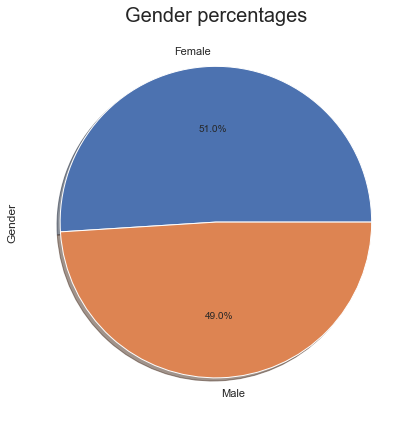

In [5]:
dataset['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Gender percentages', fontsize = 20)
plt.tight_layout()
plt.show()

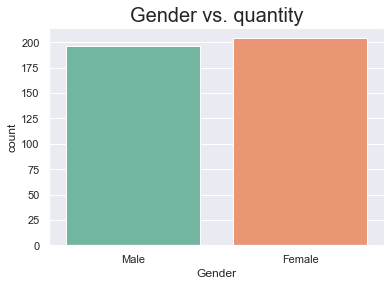

In [6]:
sns.countplot(dataset['Gender'], palette = 'Set2')
plt.title ('Gender vs. quantity', fontsize = 20)
plt.show()

*Age*

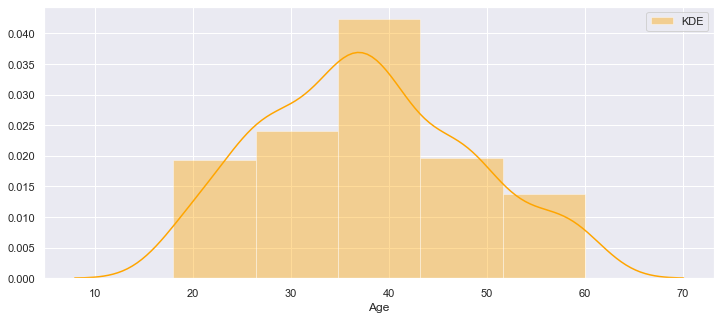

In [7]:
sns.distplot(dataset['Age'], bins = 5, color = 'orange', label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12, 5)

**Conclusion:**
- Age is normally distributed around 37 years, and most of the people studied are from 35 to 45 years.

**Let's see how age is distributed per gender**

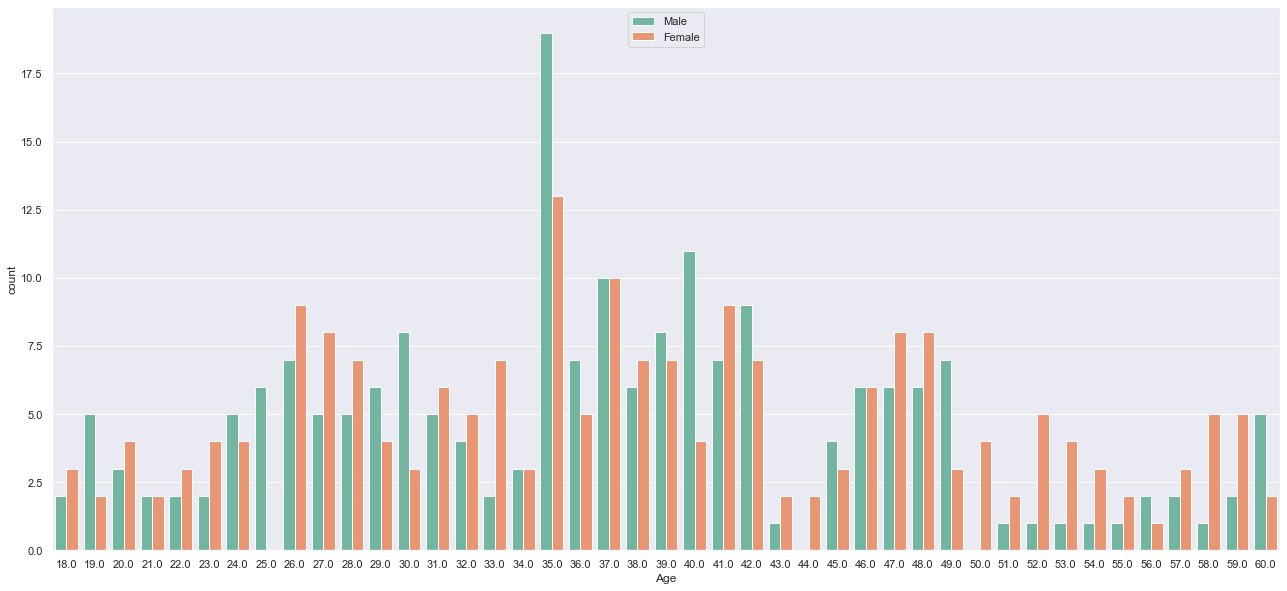

In [8]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'Age',data = dataset , hue='Gender', palette = 'Set2')
plt.legend(loc='upper center')
plt.show()

There seems to be equal analyzed people per gender per age, seeing only more men of 35 years.

In [9]:
tag1 = 'Male'
tag2 = 'Female'
Male = dataset[dataset["Gender"] == tag1][['Age','EstimatedSalary']]
Female = dataset[dataset["Gender"] == tag2][['Age','EstimatedSalary']]

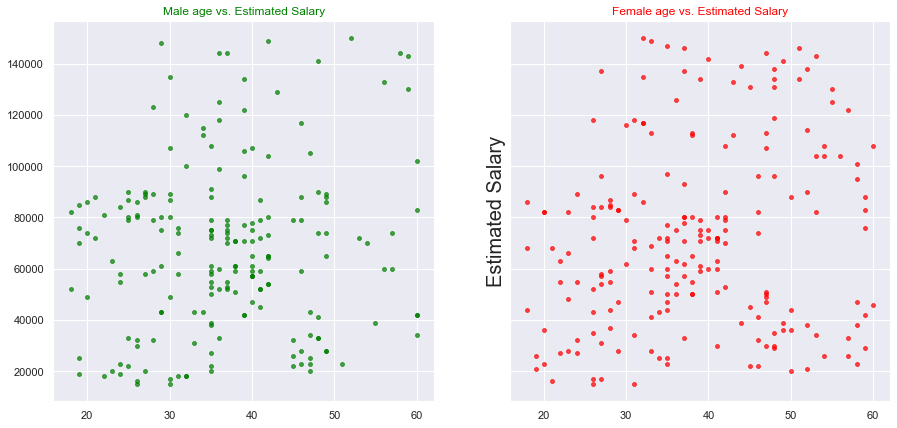

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.scatter(Male.Age, Male.EstimatedSalary, c = 'green', s = 15, alpha = 0.7)
ax1.set_title('Male age vs. Estimated Salary', c = 'green')
ax2.scatter(Female.Age, Female.EstimatedSalary, c='red', s = 15, alpha = 0.7)
ax2.set_title('Female age vs. Estimated Salary', c ='red')
plt.gcf().set_size_inches(15, 7)

plt.ylabel('Estimated Salary', fontsize = 20)

plt.show()

**Conclusion:** There is no correlation between the estimated salary of a male or female with their age.

**Statistics for purchased column**

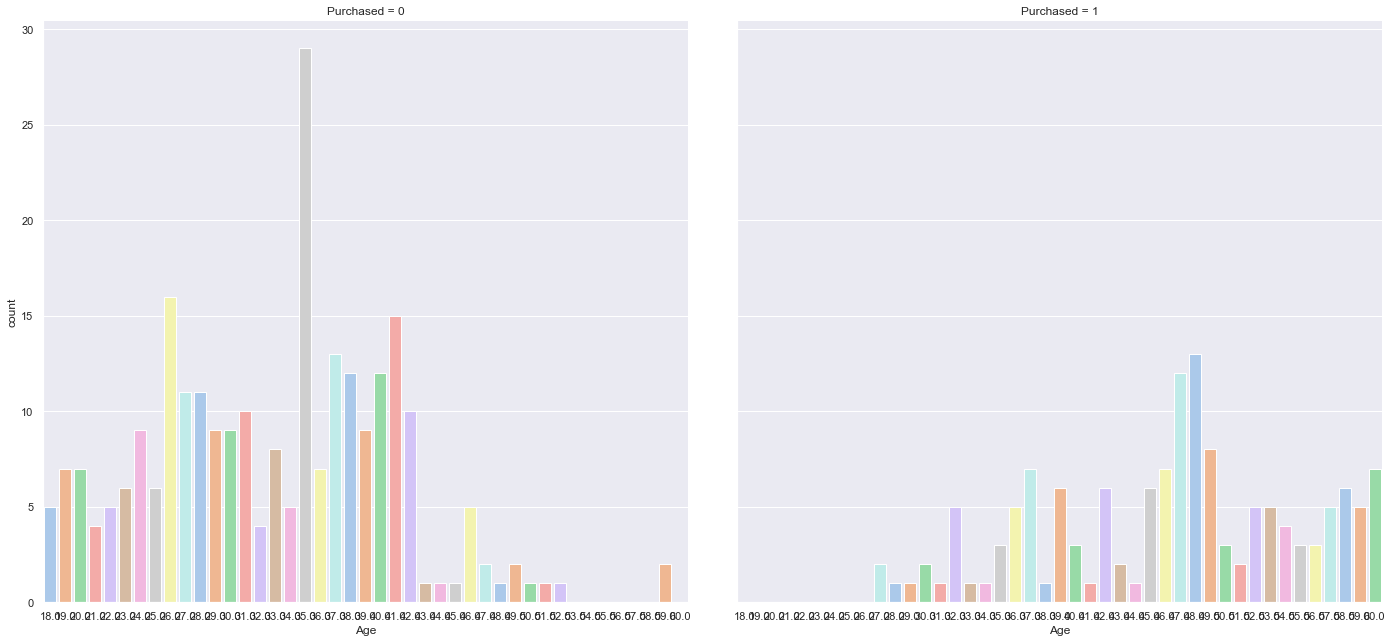

In [11]:
sns.catplot(x="Age", col = 'Purchased', data=dataset, kind = 'count', palette='pastel')
plt.gcf().set_size_inches(20, 10)
plt.show()

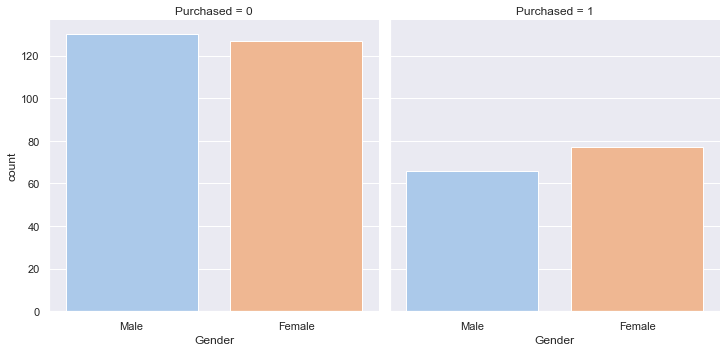

In [12]:
sns.catplot(x="Gender", col = 'Purchased', data=dataset, kind = 'count', palette='pastel')
plt.show()

**Conclusions:**
- The product seem to be intended for people within the range of 50 - 60 years, and it also seems to be intended both for male and Female gender.
- As we saw on the Age vs Salary plots, it seems that the women analyzed have higher income than men, so this might be a reason for the slight difference between gender in purchased or not terms.

**Feature Engineering**

First let´s drop the ID column as it doesn't give any information.

In [13]:
dataset2 = dataset.copy()
dataset2 = dataset2.drop(['User ID'], axis = 1)

Splitting features

In [14]:
X = dataset2.iloc[:, 0:3]
y = dataset2.iloc[:, -1]

In [15]:
X = pd.get_dummies(X)
X = X[['Gender_Male','Gender_Female','Age','EstimatedSalary']]
X = X.drop(['Gender_Male'], axis = 1)

Splitting train - test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Logistic regression modeling**

In [17]:
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

Predictions

In [18]:
y_pred = classifier.predict(X_test)

**Accuracy with confusion matrix**

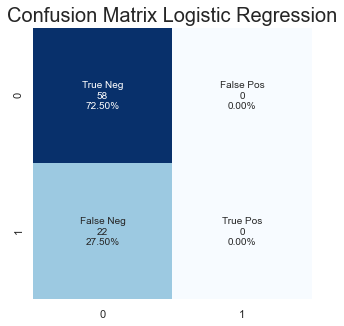

In [19]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues', cbar = False)
plt.gcf().set_size_inches(5, 5)
plt.title('Confusion Matrix Logistic Regression', fontsize = 20)
plt.show()

**As we didn't scale the data, the results and accuracy are pretty low, let's see what happens with other models**

**Logistic Regression Metrics**

In [20]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred))) 
print('Precision Score : ' + str(precision_score(y_test,y_pred))) # Relevant points
print('Recall Score : ' + str(recall_score(y_test,y_pred))) # Important to see False Negatives.

# When recall increases, precision decreases.

print('F1 Score : ' + str(f1_score(y_test,y_pred))) # Harmonic mean of precision and recall

Accuracy Score : 0.725
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


Although the precision of the logistic regression is above 0.7, the precision, recall and F1 score are 0. This is a really bad model. things could be improved scaling data or with a better tuning of the logistic regression. If we used Gridsearch, we could have found parameters that improved the model and also we could have chosen what metric to improve.

We will see what happen with other models.

Parameters of the regression

In [21]:
parameters_LR = classifier.coef_
parameters_LR

array([[-1.74060633e-10, -3.52915288e-09, -1.61879619e-06]])

**Comparing classifier algorithms: Random Forest Classifier, K-NN, Naive Bayes, and Ensambled models**

In [22]:
def clf_model(model):
    clf = model
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test).round())
    return clf, accuracy

In [23]:
model_performance = pd.DataFrame(columns = ["Model", "Accuracy"])

models_to_evaluate = [RandomForestClassifier(n_estimators=1000), KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2),
                      SVC(kernel = 'rbf'), GaussianNB(), GradientBoostingRegressor(n_estimators=300, learning_rate=0.01), 
                     AdaBoostClassifier(n_estimators=300, learning_rate=0.01), XGBClassifier(n_estimators=300, learning_rate=0.01)]

for model in models_to_evaluate:
    clf, accuracy = clf_model(model)
    model_performance = model_performance.append({"Model": model, "Accuracy": accuracy}, ignore_index=True)

model_performance

,Model,Accuracy
0,"(DecisionTreeClassifier(max_features='auto', r...",0.9375
1,KNeighborsClassifier(n_neighbors=7),0.8750
2,SVC(),0.8250
3,GaussianNB(),0.9250
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.9375
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.9375
6,"XGBClassifier(learning_rate=0.01, n_estimators...",0.9500


**Conclusion:** 
- Random Forest classifier, K-NN, SVC and Naive Bayes all reach a better accuracy than logistic regression even without scaling the data.
- Scaling the data with MinMaxScaler (commented above) made all the models reach an accuracy of 92.5%
- Ensambled models reached a better accuracy > 93%.

**CAP curve for model evaluation**

Cumulative Cccuracy Profile curve is a tool that will help evaluate the performance and accuracy of the classification model. I'm going to compare three models (SVC, K-NN and XGBoost) which all have different accuracy score. To do this, I'll compare how CAP curves for these algorithms relate to a random model and to an ideal model.

As the CAP curve gets more and more similar to the ideal model, the accuracy of the algorithm improves. We might expect that area under the plots increase as the accuracy improves. (Ideal model > XGClassifier > K-NN > SVC > Random model)

**XGClassifier**

In [24]:
XGclassifier = XGBClassifier(n_estimators=300, learning_rate=0.01)
XGclassifier.fit(X_train, y_train)
y_pred_xg = XGclassifier.predict(X_test)

**XGClassifier metrics**

In [25]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_xg)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_xg)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_xg)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_xg)))

Accuracy Score : 0.95
Precision Score : 0.875
Recall Score : 0.9545454545454546
F1 Score : 0.9130434782608695


**K-NN**

In [26]:
KNN = KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2)
KNN.fit(X_train, y_train)
y_pred_knn = KNN.predict(X_test)

**SVC**

In [27]:
SVC_clf = SVC(kernel = 'rbf')
SVC_clf.fit(X_train, y_train)
y_pred_SVC = SVC_clf.predict(X_test)

**Plotting CAP**

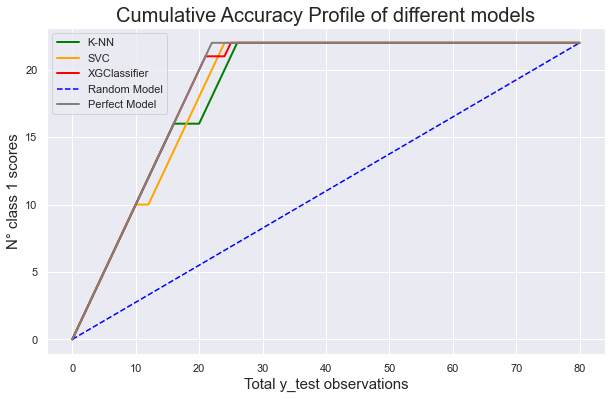

In [28]:
# length of the test data 
total = len(y_test) 
  
# Counting '1' labels in test data 
one_count = np.sum(y_test) 
  
# counting '0' lables in test data  
zero_count = total - one_count 

plt.figure(figsize = (10, 6)) 
  
# x-axis ranges from 0 to total people on y_test  
# y-axis ranges from 0 to the total positive outcomes. 

# K-NN plot

K = [y for _, y in sorted(zip(y_pred_knn, y_test), reverse = True)] 

x = np.arange(0, total + 1) # Shape of Y_test
y = np.append([0], np.cumsum(K)) # Y values

plt.plot(x, y, c = 'green', label = 'K-NN', linewidth = 2)

# SVC Plot

S = [y for _, y in sorted(zip(y_pred_SVC, y_test), reverse = True)] 

x2 = np.arange(0, total + 1) # Shape of Y_test
y2 = np.append([0], np.cumsum(S)) # Y values

plt.plot(x2, y2, c = 'orange', label = 'SVC', linewidth = 2)


# XGClassifier plot 

XG = [y for _, y in sorted(zip(y_pred_xg, y_test), reverse = True)] 

x3 = np.arange(0, total + 1) # Shape of Y_test
y3 = np.append([0], np.cumsum(XG)) # Y values

plt.plot(x3, y3, c = 'red', label = 'XGClassifier', linewidth = 2)


# Random Model plot
  
plt.plot([0, total], [0, one_count], c = 'blue',  
         linestyle = '--', label = 'Random Model') 

# Perfect model plot

plt.plot([0, one_count, total], [0, one_count, one_count], 
         c = 'grey', linewidth = 2, label = 'Perfect Model') 

plt.title('Cumulative Accuracy Profile of different models', fontsize = 20)
plt.xlabel('Total y_test observations', fontsize = 15)
plt.ylabel('N° class 1 scores', fontsize = 15)
plt.legend() 
plt.show()

**Area analysis (AUC)**

In [29]:
# Area under Random Model
a = auc([0, total], [0, one_count])

# Area between Perfect and Random Model
aP = auc([0, one_count, total], [0, one_count, one_count]) - a

# Area K-NN

aKNN = auc(x, y) - a
print("Accuracy Rate for K-NN: {}".format(aKNN / aP))

# Area SVC

aSVC = auc(x2, y2) - a
print("Accuracy Rate for Support Vector Classifier: {}".format(aSVC / aP))

# Area XGClassifier

aXG = auc(x3, y3) - a
print("Accuracy Rate for XGClassifier: {}".format(aXG / aP))

Accuracy Rate for K-NN: 0.9623824451410659
Accuracy Rate for Support Vector Classifier: 0.9623824451410659
Accuracy Rate for XGClassifier: 0.9952978056426333


**Conclusion:** 
- As expected, XGclassifier with an accuracy of 0.95 has almost the same area under the curve as the ideal model.
- SVC and K-NN have the same Accuracy rate from the AUC although they don't have the same accuracy score. 

**Plotting ROC**

Receiver Operating Characteristic curve is another way to evaluate the accuracy of classification models and also to compare between them.

It plots the True Positive Rate in the Y-axis and False Positive Rate in the X-axis. It is a way to summarize information that could be obtained from many confusion matrices.

As the AUC gets bigger, the model is better at classifying.

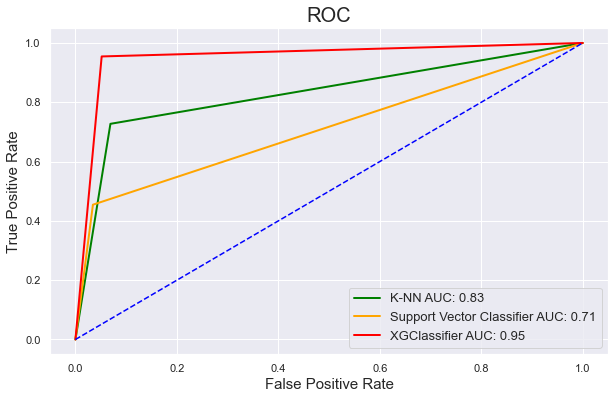

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_SVC)

fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_xg)

roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize = (10, 6)) 

plt.plot(fpr, tpr, c = 'green', linewidth = 2, label = 'K-NN AUC:' + ' {0:.2f}'.format(roc_auc))
plt.plot(fpr2, tpr2, c = 'orange', linewidth = 2, label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc2))
plt.plot(fpr3, tpr3, c = 'red', linewidth = 2, label = 'XGClassifier AUC:' + ' {0:.2f}'.format(roc_auc3))
plt.plot([0,1], [0,1], c = 'blue', linestyle = '--')

plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('ROC', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 13)
plt.show()

**Conclusion:**
- Having calculated the accuracy score, ROC and CAP, we can certainly say that the XGClassifier ensembled model is the best one yet at classifying this dataset.
- Logistic regression might have been improved scaling data, but as more robust models where used, there was no imperative need.